<h1>ANÁLISE DE ACIDENTES DE TRÂNSITO EM 2024</h1>

<h2> IMPORTAÇÃO DA BASE </h2>

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pasta = r"C:\Users\bserpellone\Desktop\Python\Dataset\acidente de transito"
df = pd.read_csv(os.path.join(pasta,'acidentes2024_todas_causas_tipos.csv'),encoding='ANSI',delimiter=';')

<h2>VISUALIZAÇÃO DA BASE</h2>

In [10]:
df.shape

(85391, 37)

A base tem 85.391 linhas e 37 colunas

Dando uma olhada nas colunas para saber quais informações estão disponíveis:

In [11]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

<h2>ANÁLISES GERAIS</h2>

<h4>Distribuição de acidentes por dias da semana</h4>

In [73]:
df['dia_semana'].value_counts(normalize=True)

dia_semana
domingo          0.155591
segunda-feira    0.145916
quarta-feira     0.144760
sábado           0.144713
terça-feira      0.140029
sexta-feira      0.135238
quinta-feira     0.133752
Name: proportion, dtype: float64

<h4>Distribuição de acidentes em % por tipo de veículo (top 5)</h4>

In [13]:
df['tipo_veiculo'].value_counts(normalize=True).sort_values(ascending=False).round(2).head(5)

tipo_veiculo
Automóvel          0.38
Motocicleta        0.19
Caminhonete        0.09
Caminhão-trator    0.07
Ônibus             0.06
Name: proportion, dtype: float64

<h4>Quais as faixas de horas que mais aconteceram acidentes?</h4>

A coluna horario tem a hora, minuto e segundo do acidente. Nessa análise gostaria de agrupar as horas em grupos de faixas de 2h:

In [15]:
df['horario'] = pd.to_datetime(df['horario'])
arredondar_abaixo = df['horario'].dt.floor('2h')
arredondar_acima = df['horario'].dt.ceil('2h')
df = df.copy()
# p/ casos que as 2 variáveis do arredondar sejam iguais, alterar:
arredondar_acima = arredondar_acima.where(arredondar_acima != arredondar_abaixo, arredondar_acima + pd.Timedelta(hours=2))
# criação da coluna hora_acidente_agrupada
df['hora_acidente_agrupada'] = arredondar_abaixo.dt.strftime('%Hh') + ' às ' + arredondar_acima.dt.strftime('%Hh')

In [16]:
df['hora_acidente_agrupada'].value_counts(normalize=True).round(2)

hora_acidente_agrupada
16h às 18h    0.12
18h às 20h    0.12
14h às 16h    0.11
12h às 14h    0.10
06h às 08h    0.09
08h às 10h    0.09
10h às 12h    0.09
20h às 22h    0.08
22h às 00h    0.06
04h às 06h    0.05
00h às 02h    0.05
02h às 04h    0.04
Name: proportion, dtype: float64

<h4>Em cada dia da semana, qual a faixa de horário que acontece mais acidentes?</h4>

In [17]:
df.groupby('dia_semana')['hora_acidente_agrupada'].value_counts(normalize=True).round(2).groupby(level=0).nlargest(1)

dia_semana     dia_semana     hora_acidente_agrupada
domingo        domingo        18h às 20h                0.15
quarta-feira   quarta-feira   16h às 18h                0.12
quinta-feira   quinta-feira   16h às 18h                0.14
segunda-feira  segunda-feira  16h às 18h                0.13
sexta-feira    sexta-feira    18h às 20h                0.13
sábado         sábado         18h às 20h                0.11
terça-feira    terça-feira    16h às 18h                0.14
Name: proportion, dtype: float64

<h4>Como foi a distribuição de acidentes por região?</h4>

<h5>Adicionando a coluna regiao a partir da uf:</h5>

In [18]:
uf_regiao = {'uf': ['AC', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'SC', 'SP', 'SE', 'TO'], 
             'regiao': ['Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Centro-oeste', 'Sudeste', 'Centro-oeste', 'Nordeste', 'Centro-oeste', 'Centro-oeste', 'Sudeste', 'Norte', 'Nordeste', 'Sul', 'Nordeste', 'Nordeste', 'Sudeste', 'Nordeste', 'Sul', 'Norte', 'Sul', 'Sudeste', 'Nordeste', 'Norte']
             }
df_uf_regiao = pd.DataFrame(uf_regiao)
df = df.merge(df_uf_regiao, on='uf')
df['regiao'].value_counts(normalize=True).round(2)

regiao
Sul             0.31
Sudeste         0.28
Nordeste        0.21
Centro-oeste    0.13
Norte           0.07
Name: proportion, dtype: float64

<h5>Normalizando pela população de cada região (dados do Censo de 2022):</h5>

In [19]:
pop_regiao = {'Centro-oeste': 16287809, 'Nordeste': 54644582, 'Norte': 17349619, 'Sudeste': 84847187, 'Sul':29933315}
acidente_regiao = df['regiao'].value_counts().round(2)
acidente_hab = acidente_regiao / acidente_regiao.index.map(pop_regiao)

In [74]:
acidente_hab.sort_values(ascending=False)

regiao
Sul             0.000870
Centro-oeste    0.000661
Norte           0.000358
Nordeste        0.000332
Sudeste         0.000278
dtype: float64

<h4>Distribuição de acidentes por idade</h4>

Agrupando a coluna idade em faixas de 5 anos:

In [20]:
limites = list(range(0, 101, 5))  # Faixas de 0 a 100 anos, com intervalos de 5 anos
rotulos = [f'{i}-{i+4}' for i in range(0, 100, 5)]  # Rótulos no formato '0-4', '5-9', '10-14', ...
df['idade_agrupada'] = pd.cut(df['idade'], bins=limites, labels=rotulos, right=False)

In [86]:
df['idade_agrupada'].value_counts(normalize=True).round(2).head(5)

idade_agrupada
35-39    0.12
25-29    0.12
40-44    0.12
30-34    0.11
20-24    0.10
Name: proportion, dtype: float64

In [78]:
df['sexo'].value_counts(normalize=True).round(2)

sexo
Masculino        0.68
Feminino         0.26
Não Informado    0.06
Ignorado         0.00
Name: proportion, dtype: float64

<h2>ACIDENTES COM MORTES FATAIS</h2>

Nessa seção vamos lidar com duas categorias: acidentes com vítimas fatais e acidentes sem vítimas fatais.

A coluna classificacao_acidente classifica a gravidade do acidente: sem vítimas, com vítimas feridas e com vítimas fatais:

In [77]:
df['classificacao_acidente'].value_counts().round(2)

classificacao_acidente
Com Vítimas Feridas    63145
Com Vítimas Fatais     13759
Sem Vítimas             7850
Name: count, dtype: int64

Criando um dataframe apenas com dados fatais (13.759 linhas), e um outro dataframe com acidentes sem casos fatais (70.995 linhas):

In [23]:
acidentes_fatais = df[df['classificacao_acidente']=='Com Vítimas Fatais']
acidentes_sem_obito = df[df['classificacao_acidente']!='Com Vítimas Fatais']

<h4>Como foi a distribuição de acidentes por tipo de pista entre o grupo com acidentes fatais e o grupo sem acidentes fatais?</h4>

In [89]:
acidentes_fatais['tipo_pista'].value_counts(normalize=True).round(2)

tipo_pista
Simples     0.75
Dupla       0.22
Múltipla    0.03
Name: proportion, dtype: float64

In [90]:
acidentes_sem_obito['tipo_pista'].value_counts(normalize=True).round(2)

tipo_pista
Simples     0.50
Dupla       0.41
Múltipla    0.09
Name: proportion, dtype: float64

Proporcionalmente, ocorreram mais acidentes com óbitos em pista simples do que acidentes sem vítimas fatais

<h4>Quais as 3 principais causas de acidentes entre os grupos?</h4>

In [82]:
acidentes_fatais['causa_acidente'].value_counts(normalize=True).round(2).head(3)

causa_acidente
Reação tardia ou ineficiente do condutor    0.13
Velocidade Incompatível                     0.12
Ausência de reação do condutor              0.10
Name: proportion, dtype: float64

In [27]:
acidentes_sem_obito['causa_acidente'].value_counts(normalize=True).round(2).head(3)

causa_acidente
Reação tardia ou ineficiente do condutor    0.15
Ausência de reação do condutor              0.11
Velocidade Incompatível                     0.09
Name: proportion, dtype: float64

In [83]:
acidentes_fatais['tipo_acidente'].value_counts(normalize=True).round(2).head(3)

tipo_acidente
Colisão frontal              0.18
Saída de leito carroçável    0.15
Tombamento                   0.14
Name: proportion, dtype: float64

In [84]:
acidentes_sem_obito['tipo_acidente'].value_counts(normalize=True).round(2).head(3)

tipo_acidente
Colisão traseira             0.15
Saída de leito carroçável    0.14
Tombamento                   0.14
Name: proportion, dtype: float64

In [85]:
acidentes_fatais['sexo'].value_counts(normalize=True).round(2)

sexo
Masculino        0.65
Feminino         0.28
Não Informado    0.07
Ignorado         0.00
Name: proportion, dtype: float64

In [32]:
acidentes_sem_obito['sexo'].value_counts(normalize=True).round(2)

sexo
Masculino        0.68
Feminino         0.26
Não Informado    0.06
Ignorado         0.00
Name: proportion, dtype: float64

Dentre as 2 categorias, as mulheres representam maior frequência em acidentes com óbito do que em acidentes sem óbito

In [68]:
acidentes_fatais[acidentes_fatais['sexo'].isin(['Masculino','Feminino'])].groupby('sexo')['idade_agrupada'].value_counts(normalize=True).round(2).groupby(level=0).nlargest(1)

sexo       sexo       idade_agrupada
Feminino   Feminino   20-24             0.12
Masculino  Masculino  40-44             0.13
Name: proportion, dtype: float64

<h4>Condição climática por categoria</h4>

In [71]:
acidentes_fatais['condicao_metereologica'].value_counts(normalize=True).round(2)

condicao_metereologica
Céu Claro           0.52
Chuva               0.23
Nublado             0.15
Sol                 0.05
Garoa/Chuvisco      0.03
Ignorado            0.01
Nevoeiro/Neblina    0.00
Vento               0.00
Name: proportion, dtype: float64

In [72]:
acidentes_sem_obito['condicao_metereologica'].value_counts(normalize=True).round(2)

condicao_metereologica
Céu Claro           0.50
Nublado             0.20
Chuva               0.17
Garoa/Chuvisco      0.06
Sol                 0.05
Ignorado            0.01
Nevoeiro/Neblina    0.01
Vento               0.00
Name: proportion, dtype: float64

<h4>Dentre os acidentes por tipo de veículo, como é a gravidade dos acidentes?</h4>

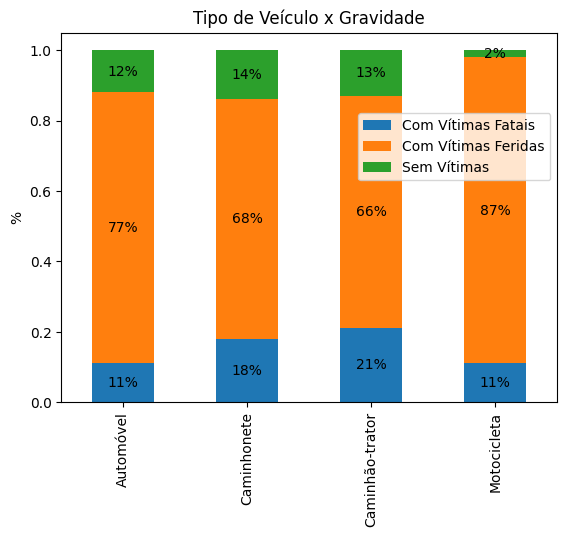

In [67]:
tipo_veiculo_gravidade = df[df['tipo_veiculo'].isin(['Automóvel','Motocicleta','Caminhonete','Caminhão-trator'])].groupby('tipo_veiculo')['classificacao_acidente'].value_counts(normalize=True).round(2)

ax = tipo_veiculo_gravidade.unstack().plot(kind='bar', stacked=True)

# Adicionando etiquetas com os valores de cada região nas barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height*100:.0f}%', (x + width/2, y + height/2), ha='center', va='center')


# Adicionando rótulos aos eixos e título
plt.xlabel('')
plt.ylabel('%')
plt.title('Tipo de Veículo x Gravidade')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.8))
# Mostrando o gráfico
plt.show()

Principais veículos por gravidade:
- vítimas fatais: caminhão-trator
- vítimas feridas: motocicleta
- sem vítimas: caminhonete

<h2>CONCLUSÃO</h2>

Alguns pontos divergem do senso comum. Por exemplo, motocicleta não é o veículo com maior índice de acidentes com vítimas fatais e acidentes fatais acontecem mais em dias com céu aberto/sol do que acidentes não fatais.